# 1. Preprocessing the Dataset

### 1.1 Checking for Files

First, we need to ensure that all required `target.csv` files are present for each participant, each experiment, and each emotion. To accomplish this, we iterate over the directories and subdirectories until we reach the end, searching specifically for a file named **"Copy of target.csv"** (which is the file we need).

If the file is found, we proceed with checking other folders. If it is not found, we add the current file path to a `missing_files` list. 

Finally, after iterating over all folders and subfolders, we check if there are any entries in the `missing_files` array. If so, we print those paths to identify the missing files.


In [19]:
import os

def check_for_files(root_folder):
    missing_files = []  # To keep track of any missing files

    # List all subfolders in the root data folder
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        for experiment in ['Main', 'Control']:
                condition_path = os.path.join(subfolder_path, experiment)
                for block in ['E1', 'E2', 'E3']:
                        exp_path = os.path.join(condition_path, block)
                        target_file = os.path.join(exp_path, 'Copy of target.csv')
                        #print(target_file)
                        # Check if target.csv exists in each experiment folder
                        if not os.path.isfile(target_file):
                            missing_files.append(target_file)

    # Report results
    if missing_files:
        print("Missing target.csv files:")
        for file_path in missing_files:
            print(file_path)
    else:
        print("All target.csv files are present.")



root_folder = "data"
check_for_files(root_folder)

All target.csv files are present.


### 1.2 Checking for Variability in Column Numbers

Upon manual inspection of the dataset, I discovered that the number of columns varied across csv files. To confirm this, we scan each CSV file and examine the min and max number of columns. 

This check is crucial because, during manual reviews, I noticed that the last column for these files contained a previous column name instead of numeric data. Therefore, it’s important to verify this as this column is unnecessary for our analysis.


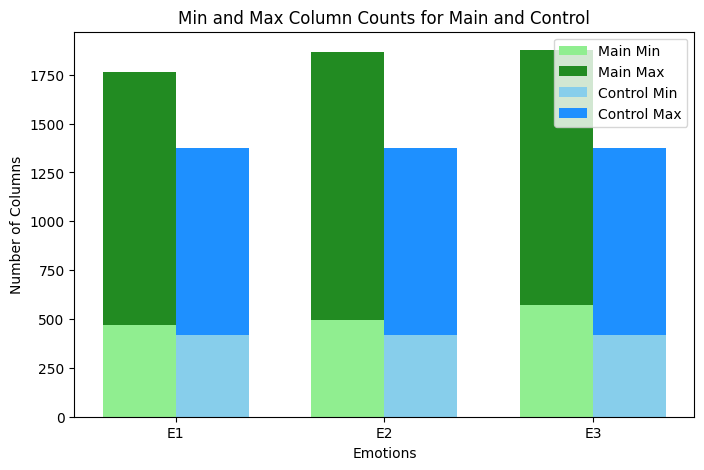

In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def check_for_last_col(root_folder):
    main=[[10000,0],[10000,0],[10000,0]]
    control=[[10000,0],[10000,0],[10000,0]]

    # List all subfolders in the root data folder
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        for experiment in ['Main', 'Control']:
                condition_path = os.path.join(subfolder_path, experiment)
                ind=0
                for block in ['E1', 'E2', 'E3']:
                        exp_path = os.path.join(condition_path, block)
                        target_file = os.path.join(exp_path, 'Copy of target.csv')
                        data=pd.read_csv(target_file)
                        col_count=len(data.columns)
                        if(experiment=="Main"):
                              # TEST FOR MIN
                              if(col_count < main[ind][0]):
                                    main[ind][0]=col_count
                              # TEST FOR MAX
                              elif(col_count > main[ind][1]):
                                    main[ind][1]=col_count
                        else:
                              # TEST FOR MIN
                              if(col_count < control[ind][0]):
                                    control[ind][0]=col_count
                              # TEST FOR MAX
                              elif(col_count > control[ind][1]):
                                    control[ind][1]=col_count
                        ind+=1
    
    datafarme={
          "Main":main,
          "Control":control
    }
    df=pd.DataFrame(datafarme)
    df.index=["E1 (Min,Max)","E2 (Min,Max)","E3 (Min,Max)"]
    #print(df.T)   
    return main,control
                              

root_folder = "data"
main,control=check_for_last_col(root_folder)
def plot_min_max(main, control):
    x_labels = ["E1", "E2", "E3"]
    x = range(len(x_labels))
    main_min, main_max = zip(*main)
    control_min, control_max = zip(*control)

    fig, ax = plt.subplots(figsize=(8, 5))
    width = 0.35  

    ax.bar([p - width/2 for p in x], main_min, width, label='Main Min', color='lightgreen')
    ax.bar([p - width/2 for p in x], main_max, width, label='Main Max', bottom=main_min, color='forestgreen')

    ax.bar([p + width/2 for p in x], control_min, width, label='Control Min', color='skyblue')
    ax.bar([p + width/2 for p in x], control_max, width, label='Control Max', bottom=control_min, color='dodgerblue')

    ax.set_xlabel("Emotions")
    ax.set_ylabel("Number of Columns")
    ax.set_title("Min and Max Column Counts for Main and Control")
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    ax.legend()
    plt.show()
plot_min_max(main,control)

### 1.3 Checking for Class Distributions

Next we procced to check for the class distributions and plot a pie chart for the same.


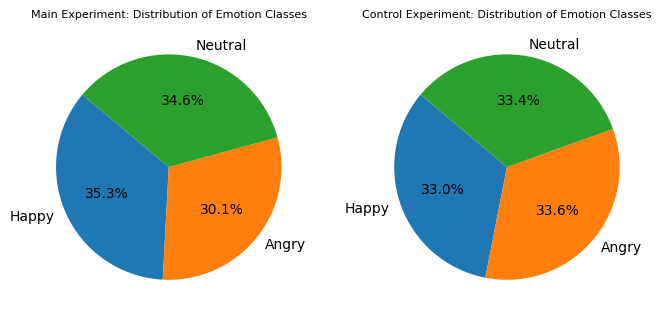

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def check_for_class_count(root_folder):
    main=[0,0,0]
    control=[0,0,0]
    # List all subfolders in the root data folder
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        for experiment in ['Main', 'Control']:
                condition_path = os.path.join(subfolder_path, experiment)
                ind=0
                for block in ['E1', 'E2', 'E3']:
                        exp_path = os.path.join(condition_path, block)
                        target_file = os.path.join(exp_path, 'Copy of target.csv')
                        data_file=pd.read_csv(target_file)
                        row_count=data_file.shape[0]
                        if(experiment=="Main"):
                              main[ind]+=row_count
                        else:
                              control[ind]+=row_count
                        ind+=1
    
    data_main = {
        'Emotion': ['Happy', 'Angry', 'Neutral'],
        'Count': main
    }
    data_control = {
        'Emotion': ['Happy', 'Angry', 'Neutral'],
        'Count': control
    }
    df_main = pd.DataFrame(data_main)
    df_control = pd.DataFrame(data_control)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

    ax1.pie(df_main['Count'], labels=df_main['Emotion'], autopct='%1.1f%%', startangle=140)
    ax1.set_title("Main Experiment: Distribution of Emotion Classes", fontsize=8)
    
    ax2.pie(df_control['Count'], labels=df_control['Emotion'], autopct='%1.1f%%', startangle=140)
    ax2.set_title("Control Experiment: Distribution of Emotion Classes", fontsize=8)
    plt.show()                



root_folder = "data"
check_for_class_count(root_folder)

### 1.4 Cleaning the Data and Making a New CSV File

After confirming that the last column is unnecessary, we will delete it. Additionally, I found that the first column, which contains the names of the images presented as stimuli to each participant, can also be removed. Also column which have no values for entire rows can be deleted also.

As specified in the assignment, we need to eliminate columns from **t1 to t86**, which represent pupil diameter during the fixation period. We proceed to remove these columns to clean the dataset. 

After cleaning, we create a new CSV file for each original CSV file and save it in the same location with the name `new.csv`


In [22]:
import os
import csv
import pandas as pd


def delete_cols(file,indexes):
    empty_cols=[]
    new_file = file.drop(file.columns[indexes],axis=1)
    new_file = new_file.drop(new_file.columns[2:88],axis=1)
    for i in range(2,len(new_file.columns)):
        col=new_file[new_file.columns[i]]
        avg=col.mean(skipna=True)
        if(pd.isna(avg)):
           empty_cols.append(i)
    if(empty_cols!=[]):
        new_file = new_file.drop(new_file.columns[empty_cols],axis=1)
    return new_file

def preprocess_data(root_folder):

    # List all subfolders in the root data folder
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        for experiment in ['Main', 'Control']:
                condition_path = os.path.join(subfolder_path, experiment)
                for block in ['E1', 'E2', 'E3']:
                        exp_path = os.path.join(condition_path, block)
                        target_file = os.path.join(exp_path, 'Copy of target.csv')
                        old_file = pd.read_csv(target_file)
                        index=[0,len(old_file.columns)-1]
                        new_file = delete_cols(old_file,index)
                        new_file_path=os.path.join(exp_path,'new.csv')
                        pd.DataFrame.to_csv(new_file,new_file_path,index=False)
                        print("Data Saved for file: ",new_file_path)
                        


root_folder = "data"
preprocess_data(root_folder)

Data Saved for file:  data\AMN\Main\E1\new.csv
Data Saved for file:  data\AMN\Main\E2\new.csv
Data Saved for file:  data\AMN\Main\E3\new.csv
Data Saved for file:  data\AMN\Control\E1\new.csv
Data Saved for file:  data\AMN\Control\E2\new.csv
Data Saved for file:  data\AMN\Control\E3\new.csv
Data Saved for file:  data\ANA\Main\E1\new.csv
Data Saved for file:  data\ANA\Main\E2\new.csv
Data Saved for file:  data\ANA\Main\E3\new.csv
Data Saved for file:  data\ANA\Control\E1\new.csv
Data Saved for file:  data\ANA\Control\E2\new.csv
Data Saved for file:  data\ANA\Control\E3\new.csv
Data Saved for file:  data\JAK\Main\E1\new.csv
Data Saved for file:  data\JAK\Main\E2\new.csv
Data Saved for file:  data\JAK\Main\E3\new.csv
Data Saved for file:  data\JAK\Control\E1\new.csv
Data Saved for file:  data\JAK\Control\E2\new.csv
Data Saved for file:  data\JAK\Control\E3\new.csv
Data Saved for file:  data\LAK\Main\E1\new.csv
Data Saved for file:  data\LAK\Main\E2\new.csv
Data Saved for file:  data\LAK\Ma

# 2. Reaction Time

### 2.1 Calculating the Median for Each Participant's Data

To condense each particpant's reaction time for a single `new.csv`, we have to take median of that column. 

Taking median ensures that reaction times don't get skewed by outliers, like occasional slow or fast responses that are not typical of a participant's usual response pattern.The median provides a more robust measure of central tendency in such cases, as it is less influenced by extreme values compared to the mean. 

Additionally, since there are no NA values in the reaction time columns, we can proceed without any need for handling missing data.

Hence through this step, we get the reaction times of each participant for main and control experiments and for each emotion too. 

After getting all this data we save this as `main_reaction_time.csv` for main experiments and `control_reaction_time.csv` for control experiments. In each of these csv files rows represent the participant and columns represents the emotions- E1,E2 and E3.

In [23]:
import os
import pandas as pd


def median_for_response_time(root_folder,experiment,intermediate_dict):
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        condition_path = os.path.join(subfolder_path, experiment)
        for block in ['E1', 'E2', 'E3']:
            exp_path = os.path.join(condition_path, block)
            target_file = os.path.join(exp_path, 'new.csv')
            old_file = pd.read_csv(target_file)
            median_reaction_time=old_file["response_time"].median()
            intermediate_dict[subfolder+"_"+experiment].append(median_reaction_time)

      

def init_dict(root_folder,experiment):
    intermediate_dict={}
    for subfolder in os.listdir(root_folder):
        intermediate_dict[subfolder+"_"+experiment]=[]
    return intermediate_dict

                        
root_folder = "data"

intermediate_dict_main=init_dict(root_folder,"Main")
intermediate_dict_control=init_dict(root_folder,"Control")

median_for_response_time(root_folder,"Main",intermediate_dict_main)
median_for_response_time(root_folder,"Control",intermediate_dict_control)

main_dataframe=pd.DataFrame(intermediate_dict_main).T
control_dataframe=pd.DataFrame(intermediate_dict_control).T
main_dataframe.columns=["E1","E2","E3"]
control_dataframe.columns=["E1","E2","E3"]
print("--------FOR MAIN EXPERIMENT------")
print(main_dataframe)
print("\n--------FOR CONTROL EXPERIMENT------")
print(control_dataframe)

pd.DataFrame.to_csv(main_dataframe,"main_reaction_time.csv",index=True,index_label="Name")
pd.DataFrame.to_csv(control_dataframe,"control_reaction_time.csv",index=True,index_label="Name")


--------FOR MAIN EXPERIMENT------
                E1        E2        E3
AMN_Main  0.389359  0.516025  0.626478
ANA_Main  0.319404  0.424007  0.506544
JAK_Main  0.393541  0.597731  0.550417
LAK_Main  0.477074  0.513060  0.505325
MAN_Main  0.358125  0.499928  0.673193
PAR_Main  0.417079  0.652743  0.475473
SAM_Main  0.286153  0.384677  0.342128
SUK_Main  0.352999  0.607731  0.463735
SYD_Main  0.354382  0.622882  0.496428
VIK_Main  0.435562  0.673234  0.499720

--------FOR CONTROL EXPERIMENT------
                   E1        E2        E3
AMN_Control  0.242446  0.259158  0.244703
ANA_Control  0.200777  0.195256  0.170960
JAK_Control  0.239751  0.250178  0.223277
LAK_Control  0.217109  0.207011  0.207011
MAN_Control  0.197726  0.202279  0.199297
PAR_Control  0.316647  0.322229  0.313044
SAM_Control  0.207770  0.187352  0.185924
SUK_Control  0.201880  0.199822  0.203356
SYD_Control  0.219745  0.220547  0.232412
VIK_Control  0.189638  0.202784  0.215552


### 2.2 Calculating the Overall Median for Main and Control Experiments

After getting the medians for each participant across each experiemnt and each emotion, now we need to further condense this data to a single array for each experiment.

Currently we have a matrix of shape 10 X 3 for each experiment, and now we need to convert this to a matrix of shape 1 X 3 for each experiemnt.

To do this, we again repeat the same process of taking medians across each of the columns, this gives us a single dimensional array for each experiment, with 3 values which represent the overall reaction time of each emotion- E1,E2 and E3.

Next we save this data too as `final_reaction_time.csv`.

In [24]:
import pandas as pd


def final_medians(file_name):
    medians=[]
    file=pd.read_csv(file_name)
    e1_median=file["E1"].median()
    e2_median=file["E2"].median()
    e3_median=file["E3"].median()

    medians.append(e1_median)
    medians.append(e2_median)
    medians.append(e3_median)

    return medians


final_dict={
    "Main":[],
    "Control":[]
}

main_data=final_medians("main_reaction_time.csv")
control_data=final_medians("control_reaction_time.csv")

final_dict["Main"]=main_data
final_dict["Control"]=control_data

final_data=pd.DataFrame(final_dict).T
final_data.columns=["E1","E2","E3"]
print(final_data)

pd.DataFrame.to_csv(final_data,"final_reaction_time.csv",index=True,index_label="Experiment")

               E1        E2        E3
Main     0.373742  0.556878  0.502522
Control  0.212439  0.204898  0.211282


### 2.3 Plotting Reaction Time Graphs

Now we have got the data in a single array for each of the experiemnt, we simply proceed to plot this data using matplotlib library of python.

- **X-Axis**: Represents the three emotions—E1, E2, and E3.
- **Y-Axis**: Represents the reaction time values.

In the plot:
- The **blue line** represents the trend for the Main experiment.
- The **yellow line** represents the trend for the Control experiment.

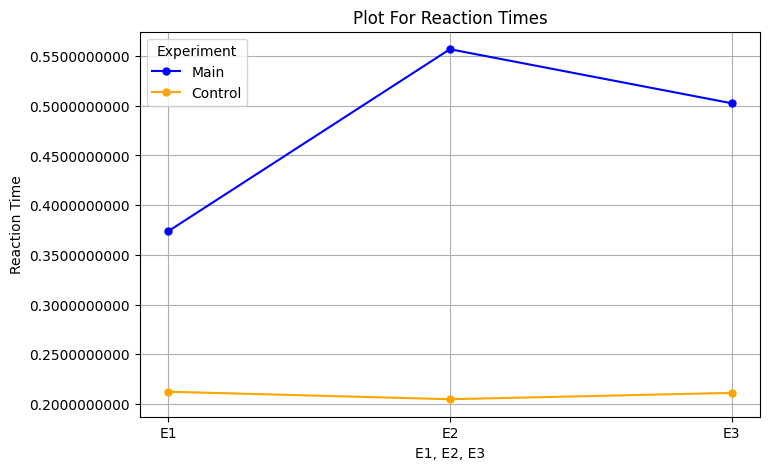

In [25]:
import matplotlib.pyplot as plt
data=pd.read_csv("final_reaction_time.csv")

x_labels = ['E1', 'E2', 'E3']
y_values = data.set_index('Experiment').T  

plt.figure(figsize=(8, 5))
plt.plot(x_labels, y_values['Main'], 'o-', color='blue', label='Main', markersize=5)
plt.plot(x_labels, y_values['Control'], 'o-', color='orange', label='Control', markersize=5)

plt.xlabel('E1, E2, E3')
plt.ylabel('Reaction Time')
plt.title('Plot For Reaction Times')
plt.legend(title='Experiment')
plt.grid()
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.10f'))

plt.show()

# 3. Pupil Diameter Analysis

### 3.1 Taking Average values for each participant

We start taking average values across each column for every `new.csv`. 

Now as we know that each row does not have values present for every column hence, there would be some rows which have `NA` in place and we have to ignore such rows while taking mean.

Hence we use `skipna=True` while taking mean of the columns.

After taking mean we save this data into files: `main_pupil.csv` and `control_pupil.csv` which represents mean of the participant for that particular column. Also the structure of these files is comman, first 10 rows represents mean for E1, next 10 rows represent mean for E2 and lastly remaining 10 rows represent mean for E3, while column starts from 0, which represents t87 and goes on after that. 

In [26]:
import os
import pandas as pd

      
def find_avg_pupil_diameter(root_folder,experiment,intermediate_dict):
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        condition_path = os.path.join(subfolder_path, experiment)
        for block in ['E1', 'E2', 'E3']:
            exp_path = os.path.join(condition_path, block)
            target_file = os.path.join(exp_path, 'new.csv')
            data_file = pd.read_csv(target_file)
            for col in range(2,len(data_file.columns)):
                col_name = data_file.columns[col]
                avg=data_file[col_name].mean(skipna=True)
                intermediate_dict[subfolder+"_"+experiment+"_"+block].append(avg)
    

def make_data_consistent(intermediate_dict):
    max_cols=0
    for key,value in intermediate_dict.items():
        max_cols=max(max_cols,len(value))

    for key,value in intermediate_dict.items():
        col_nums=len(intermediate_dict[key])
        intermediate_dict[key].extend([None] * (max_cols - col_nums))




def init_dict(root_folder,experiment):
    intermediate_dict={}
    for block in ['E1', 'E2', 'E3']:
        for subfolder in os.listdir(root_folder):
            intermediate_dict[subfolder+"_"+experiment+"_"+block]=[]
    return intermediate_dict


def find_avg_across_blocks(data):
    avg_diameter=[]
    for col in range(1,len(data.columns)):
        col_name = data.columns[col]
        avg=data[col_name].mean(skipna=True)
        avg_diameter.append(avg)
    return avg_diameter


root_folder = "data"

intermediate_dict_main=init_dict(root_folder,"Main")
intermediate_dict_control=init_dict(root_folder,"Control")

find_avg_pupil_diameter(root_folder,"Main",intermediate_dict_main)
find_avg_pupil_diameter(root_folder,"Control",intermediate_dict_control)

make_data_consistent(intermediate_dict_main)
make_data_consistent(intermediate_dict_control)

main_data = pd.DataFrame(intermediate_dict_main).T
file_name="main_pupil.csv"
pd.DataFrame.to_csv(main_data,file_name,index=True,index_label="Name")
print("Data Saved for each participant's Main experiment under: ",file_name)

control_data = pd.DataFrame(intermediate_dict_control).T
file_name="control_pupil.csv"
pd.DataFrame.to_csv(control_data,file_name,index=True,index_label="Name")
print("Data Saved for each participant's Control experiment under: ",file_name)

Data Saved for each participant's Main experiment under:  main_pupil.csv
Data Saved for each participant's Control experiment under:  control_pupil.csv


### 3.2 Taking Final Average Values for each experiment

Now in earlier step we have got average values across each column for participants, hence in total we got 10 arrays each for experiement & emotion.

Now we proceed further, and take average across those 10 arrays to get a single array.

Hence, now we will have just a single array for combination of experiment and emotion.

In [27]:
import pandas as pd

def find_avg_across_blocks(data):
    avg_diameter=[]
    for col in range(1,len(data.columns)):
        col_name = data.columns[col]
        avg=data[col_name].mean(skipna=True)
        avg_diameter.append(avg)
    return avg_diameter


def add_ts_row_header(final_data):
    row=[]
    for t in range(len(final_data.columns)):
        new_t="t"+str(87+t)
        row.append(new_t)
    return row


main_data=pd.read_csv("main_pupil.csv")
control_data=pd.read_csv("control_pupil.csv")

main_e1_data = main_data.iloc[0:10]
main_e2_data = main_data.iloc[10:20]
main_e3_data = main_data.iloc[20:30]
final_main={
    "E1":[],
    "E2":[],
    "E3":[]
}
final_main["E1"]=find_avg_across_blocks(main_e1_data)
final_main["E2"]=find_avg_across_blocks(main_e2_data)
final_main["E3"]=find_avg_across_blocks(main_e3_data)
final_data=pd.DataFrame(final_main).T
final_data.columns=add_ts_row_header(final_data)
file_name="final_main_pupil.csv"
pd.DataFrame.to_csv(final_data,file_name,index=False)
print("Data Saved for Final Main Pupil Diameter under: ",file_name)



control_e1_data = control_data.iloc[0:10]
control_e2_data = control_data.iloc[10:20]
control_e3_data = control_data.iloc[20:30]
final_control={
    "E1":[],
    "E2":[],
    "E3":[]
}
final_control["E1"]=find_avg_across_blocks(control_e1_data)
final_control["E2"]=find_avg_across_blocks(control_e2_data)
final_control["E3"]=find_avg_across_blocks(control_e3_data)
final_data=pd.DataFrame(final_control).T
final_data.columns=add_ts_row_header(final_data)
file_name="final_control_pupil.csv"
pd.DataFrame.to_csv(final_data,file_name,index=False)
print("Data Saved for Final Control Pupil Diameter under: ",file_name)

Data Saved for Final Main Pupil Diameter under:  final_main_pupil.csv
Data Saved for Final Control Pupil Diameter under:  final_control_pupil.csv


### 3.3 Plotting the Pupil Diameter vs time Graph

Now we have got the average time series data for each combination of experiment & emotion. Hence we proceed further by making a plot for pupil diameter.

- **X-Axis**: Represents the time in ms
- **Y-Axis**: Represents the pupil diameter.

In the plot:
- **Solid Lines** represents the trend for the Main experiment.
- **Dotted Lines** represents the trend for the Control experiment.

Further Division in plots using color codes:
- **Blue Line** represents the E1.
- **Orange Line** represents the E2.
- **Green Line** represents the E3.

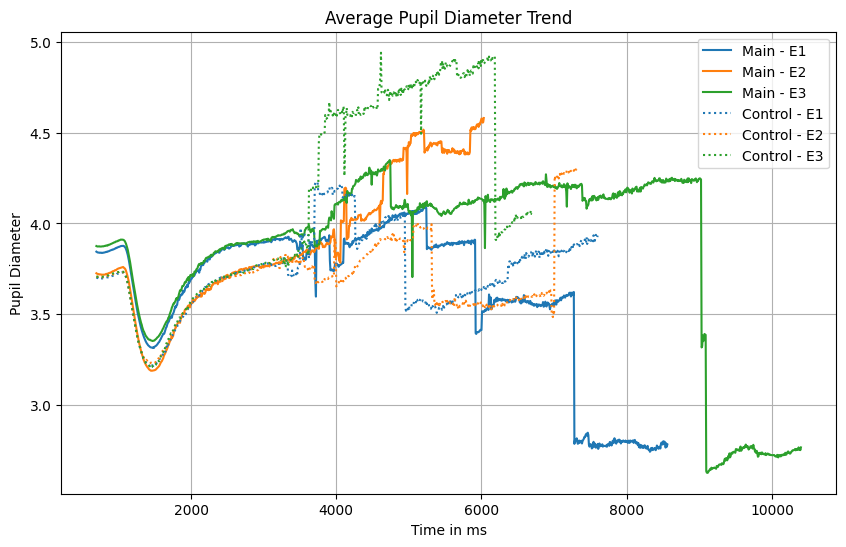

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


file1 = pd.read_csv("final_main_pupil.csv")
file2 = pd.read_csv("final_control_pupil.csv")

time_in_ms=[]
for t in range(len(file1.columns)):
    time=696+t*8
    time_in_ms.append(time)
file1.columns=time_in_ms

time_in_ms=[]
for t in range(len(file2.columns)):
    time=696+t*8
    time_in_ms.append(time)
file2.columns=time_in_ms

plt.figure(figsize=(10, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
line_styles = ['-', ':']  


for row_idx in range(file1.shape[0]):
    plt.plot(file1.columns.astype(int), file1.iloc[row_idx], color=colors[row_idx], linestyle=line_styles[0], label=f'Main - E{row_idx + 1}')


for row_idx in range(file2.shape[0]):
    plt.plot(file2.columns.astype(int), file2.iloc[row_idx], color=colors[row_idx], linestyle=line_styles[1], label=f'Control - E{row_idx + 1}')

plt.xlabel('Time in ms')
plt.ylabel('Pupil Diameter')
plt.title('Average Pupil Diameter Trend')
plt.legend()
plt.grid(True)
plt.show()


## 4 Supporting Plots
### 4.1 Plot for rate of change of pupil diameter with time

After plotting the pupil diameter with time, there is a `V` shaped curve between 1000 ms to 2500 ms, here pupil diameter constricts and dilates and this region corresponds to time after participant sees the stimulus and responds to it till the response time window.


- **X-Axis**: Represents the time in ms
- **Y-Axis**: Represents the Rate of change of pupil diameter with time.

In the plot:
- **Solid Lines** represents the trend for the Main experiment.
- **Dotted Lines** represents the trend for the Control experiment.

Further Division in plots using color codes:
- **Blue Line** represents the E1.
- **Orange Line** represents the E2.
- **Green Line** represents the E3.

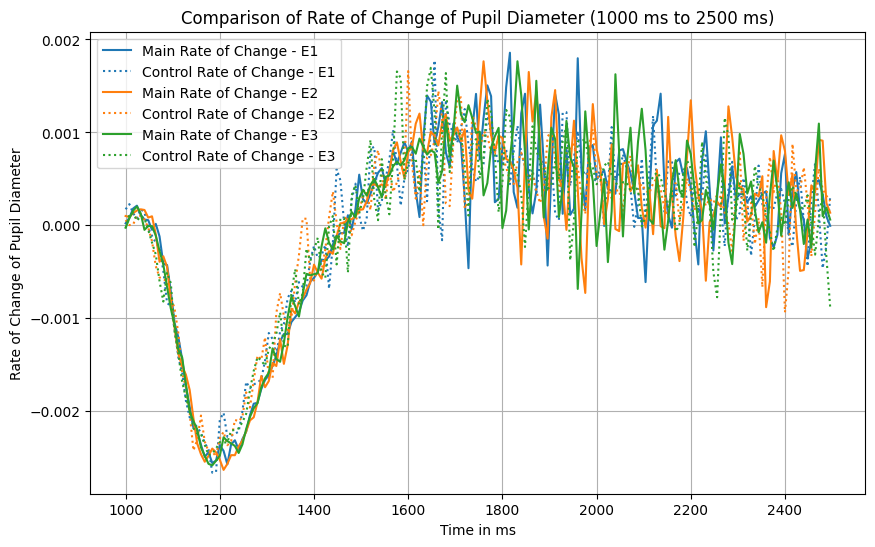

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def slice_columns(file,start_time,end_time):
    filter=[]
    for col in file.columns:
        if((start_time <= col) and (col <=end_time)):
            filter.append(col)
    return filter

file1 = pd.read_csv("final_main_pupil.csv")
file2 = pd.read_csv("final_control_pupil.csv")


def calculate_slope(file,filtered_cols):
    slopes=[]
    for row_ind in range(file.shape[0]):
        slope_of_point=np.gradient(file.iloc[row_ind], filtered_cols)
        slopes.append(slope_of_point)
    return slopes


time_in_ms=[]
for t in range(len(file1.columns)):
    time=696+t*8
    time_in_ms.append(time)
file1.columns=time_in_ms

time_in_ms=[]
for t in range(len(file2.columns)):
    time=696+t*8
    time_in_ms.append(time)
file2.columns=time_in_ms


start_time = 1000
end_time = 2500


filtered_columns = slice_columns(file1,start_time,end_time)
file1_filtered = file1[filtered_columns]
file2_filtered = file2[filtered_columns]

filtered_columns = np.array(filtered_columns)


slopes_main = calculate_slope(file1_filtered,filtered_columns)
slopes_control = calculate_slope(file2_filtered,filtered_columns)


slopes_main = np.array(slopes_main)
slopes_control = np.array(slopes_control)
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  


for row_idx in range(file1_filtered.shape[0]):
    plt.plot(filtered_columns, slopes_main[row_idx], color=colors[row_idx], linestyle='-', label=f'Main Rate of Change - E{row_idx + 1}')
    plt.plot(filtered_columns, slopes_control[row_idx], color=colors[row_idx], linestyle=':', label=f'Control Rate of Change - E{row_idx + 1}')

plt.xlabel('Time in ms')
plt.ylabel('Rate of Change of Pupil Diameter')
plt.title('Comparison of Rate of Change of Pupil Diameter (1000 ms to 2500 ms)')
plt.legend()
plt.grid(True)
plt.show()

### 4.2 Pupil Diameter variation between 1000 ms to 2500 ms

To show the pupil diameter variation for 1000 ms to 2500 ms, we again plot the earlier plot, but only for the region 1000 ms to 2500 ms.

- **X-Axis**: Represents the time in ms
- **Y-Axis**: Represents the pupil diameter.

In the plot:
- **Solid Lines** represents the trend for the Main experiment.
- **Dotted Lines** represents the trend for the Control experiment.

Further Division in plots using color codes:
- **Blue Line** represents the E1.
- **Orange Line** represents the E2.
- **Green Line** represents the E3.

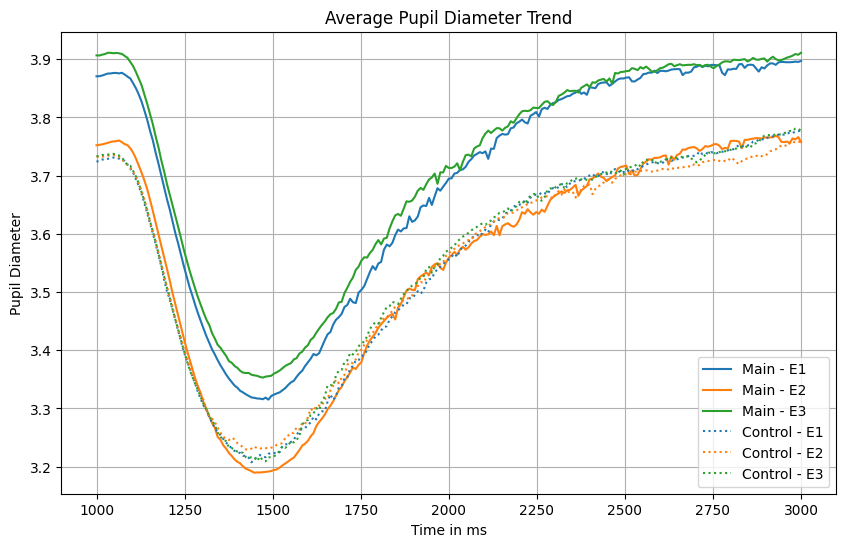

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def slice_columns(file,start_time,end_time):
    filter=[]
    for col in file.columns:
        if((start_time <= col) and (col <=end_time)):
            filter.append(col)
    return filter

file1 = pd.read_csv("final_main_pupil.csv")
file2 = pd.read_csv("final_control_pupil.csv")


def calculate_slope(file,filtered_cols):
    slopes=[]
    for row_ind in range(file.shape[0]):
        slope_of_point=np.gradient(file.iloc[row_ind], filtered_cols)
        slopes.append(slope_of_point)
    return slopes


time_in_ms=[]
for t in range(len(file1.columns)):
    time=696+t*8
    time_in_ms.append(time)
file1.columns=time_in_ms

time_in_ms=[]
for t in range(len(file2.columns)):
    time=696+t*8
    time_in_ms.append(time)
file2.columns=time_in_ms


start_time = 1000
end_time = 3000


filtered_columns = slice_columns(file1,start_time,end_time)
file1_filtered = file1[filtered_columns]
file2_filtered = file2[filtered_columns]

file1=file1_filtered
file2=file2_filtered
plt.figure(figsize=(10, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
line_styles = ['-', ':']  


for row_idx in range(file1.shape[0]):
    plt.plot(file1.columns.astype(int), file1.iloc[row_idx], color=colors[row_idx], linestyle=line_styles[0], label=f'Main - E{row_idx + 1}')


for row_idx in range(file2.shape[0]):
    plt.plot(file2.columns.astype(int), file2.iloc[row_idx], color=colors[row_idx], linestyle=line_styles[1], label=f'Control - E{row_idx + 1}')

plt.xlabel('Time in ms')
plt.ylabel('Pupil Diameter')
plt.title('Average Pupil Diameter Trend')
plt.legend()
plt.grid(True)
plt.show()
